# **TIRE QUALITY ASSESSMENT**

### **DATASET DESCRIPTION**
The dataset consists of 1028 images of tires in total.<br>
This dataset is split into training and testing data, Which is further split into Cracked(Oxidized) and Normal Tires. It can be used for binary classification
Files:
- training_data
- testing_data

#### **Importing Libraries & Mounting Drive**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
%matplotlib inline

#### **Extracting the Images & Sampling the Data**

Image Size:	(2718, 2718, 3)


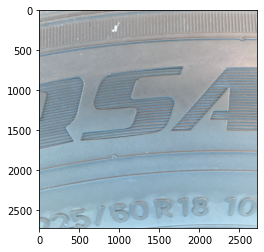

In [2]:
#Sample Normal Tyre
img1 = cv2.imread("../input/tire-texture-image-recognition/Tire Textures/testing_data/normal/IMG_4300.jpg")
print(f"Image Size:\t{img1.shape}")
plt.imshow(img1)

Image Size:	(2505, 2505, 3)


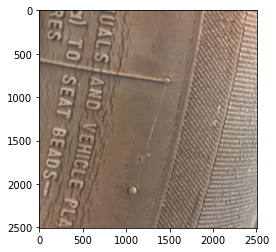

In [3]:
#Sample Cracked Tyre
img2 = cv2.imread("../input/tire-texture-image-recognition/Tire Textures/testing_data/cracked/IMG_4449.jpg")
print(f"Image Size:\t{img2.shape}")
plt.imshow(img2)

In [4]:
trainDir = "../input/tire-texture-image-recognition/Tire Textures/training_data"
testDir = "../input/tire-texture-image-recognition/Tire Textures/testing_data"

In [5]:
trainGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                        
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split=0.15)

testGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [6]:
trainData = trainGen.flow_from_directory(trainDir,
                                            target_size = (224, 224),
                                            class_mode = "categorical",
                                            batch_size = 32,
                                            subset = 'training')

valData = trainGen.flow_from_directory(trainDir,
                                            target_size = (224, 224),
                                            class_mode = "categorical",
                                            batch_size = 32,
                                            subset = 'validation')

testData = testGen.flow_from_directory(testDir,
                                          target_size = (224, 224),
                                          class_mode = "categorical",
                                          batch_size = 32)

Found 598 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Found 325 images belonging to 2 classes.


In [7]:
labelNamesTrain = list(trainData.class_indices.keys())
labelNamesTest = list(testData.class_indices.keys())
print(f"CLASSES AVAILABLE IN THE DATASET: {trainData.class_indices}\n")

import os
trainCracked = len(os.listdir("../input/tire-texture-image-recognition/Tire Textures/training_data/cracked"))
print(f"Cracked Images in Training Dataset: {trainCracked}")
trainNormal = len(os.listdir("../input/tire-texture-image-recognition/Tire Textures/training_data/normal"))
print(f"Normal Images in Training Dataset: {trainNormal}")
testCracked = len(os.listdir("../input/tire-texture-image-recognition/Tire Textures/testing_data/cracked"))
print(f"Cracked Images in Testing Dataset: {testCracked}")
testNormal = len(os.listdir("../input/tire-texture-image-recognition/Tire Textures/testing_data/normal"))
print(f"Normal Images in Testing Dataset: {testNormal}")

CLASSES AVAILABLE IN THE DATASET: {'cracked': 0, 'normal': 1}

Cracked Images in Training Dataset: 327
Normal Images in Training Dataset: 376
Cracked Images in Testing Dataset: 210
Normal Images in Testing Dataset: 115


In [8]:
image, label = trainData.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 2)


2022-06-07 10:42:34.192298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:42:34.309297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:42:34.310053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 10:42:34.312029: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

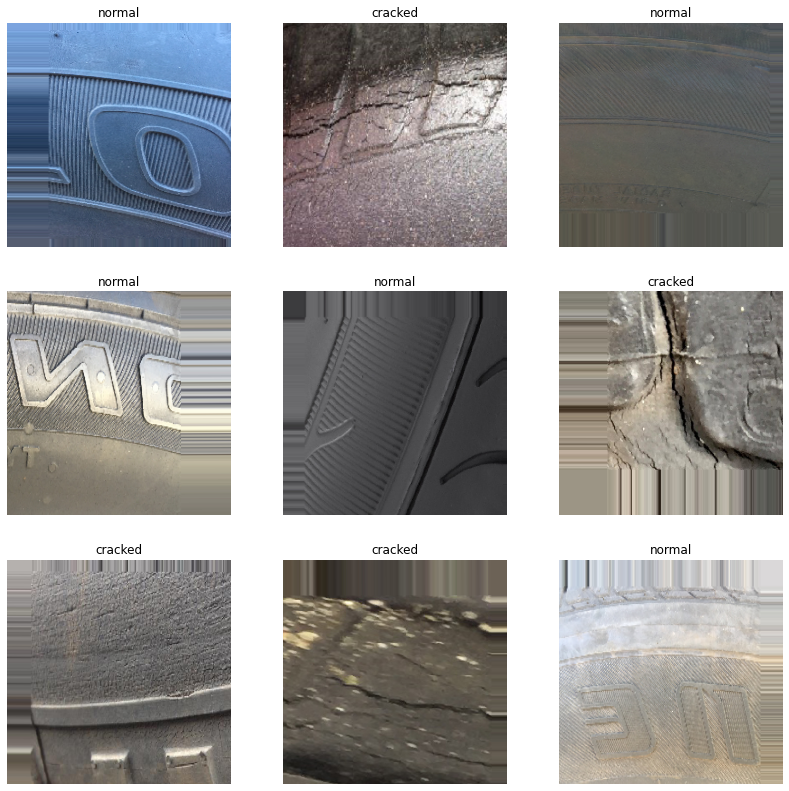

In [9]:
plt.figure(figsize=(14,14))

for i in range(9):
  image, label = trainData.next()
 
  plt.subplot(3,3,i+1)
  plt.imshow(image[i])
  plt.title(labelNamesTrain[tf.argmax(label[i])])
  plt.axis("off")
plt.show()

### **Building & Training a Basic CNN Model**

In [10]:
#Building a Basic CNN Model

from tensorflow.keras import layers

cnnModel = tf.keras.Sequential([
                             layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(224,224,3)),                             
                             layers.Conv2D(filters= 16, kernel_size=(3, 3), activation="relu"),
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),
                             
                             layers.Conv2D(filters= 32, kernel_size=(3,3), activation="relu"),                             
                             layers.Conv2D(filters= 32, kernel_size=(3,3), activation="relu"),  
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),

                             layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),                             
                             layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),
                             layers.Flatten(),

                             layers.Dense(2048, activation="relu"),
                             layers.Dropout(0.1),
                             layers.Dense(1024, activation ="relu"),
                             layers.Dropout(0.2),
                             layers.Dense(1024, activation="relu"),

                             layers.Dense(2, activation="softmax")
                            
])

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
dropout (Dropout)            (None, 220, 220, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 106, 106, 32)      0

In [11]:
#Compiling the Model
cnnModel.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00085),
    metrics = ["accuracy"]
)

In [12]:
#Fitting the data to the model
modelFit0 = cnnModel.fit(trainData,
          epochs = 10,
          steps_per_epoch = len(trainData),
          validation_data = valData,
          validation_steps = len(valData)
)

2022-06-07 10:42:51.340937: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-07 10:42:54.377187: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


19/19 [==============================] - 43s 2s/step - loss: 0.8550 - accuracy: 0.5468 - val_loss: 0.7537 - val_accuracy: 0.4476
Epoch 2/10
19/19 [==============================] - 30s 2s/step - loss: 0.6837 - accuracy: 0.5502 - val_loss: 0.7485 - val_accuracy: 0.4190
Epoch 3/10
19/19 [==============================] - 30s 2s/step - loss: 0.6858 - accuracy: 0.5635 - val_loss: 0.6978 - val_accuracy: 0.5333
Epoch 4/10
19/19 [==============================] - 30s 2s/step - loss: 0.6595 - accuracy: 0.5753 - val_loss: 0.7451 - val_accuracy: 0.4381
Epoch 5/10
19/19 [==============================] - 30s 2s/step - loss: 0.6679 - accuracy: 0.6221 - val_loss: 0.6998 - val_accuracy: 0.4762
Epoch 6/10
19/19 [==============================] - 29s 2s/step - loss: 0.6611 - accuracy: 0.6204 - val_loss: 0.7209 - val_accuracy: 0.4952
Epoch 7/10
19/19 [==============================] - 30s 2s/step - loss: 0.6337 - accuracy: 0.6488 - val_loss: 0.7362 - val_accuracy: 0.4190
Epoch 8/10
19/19 [=============

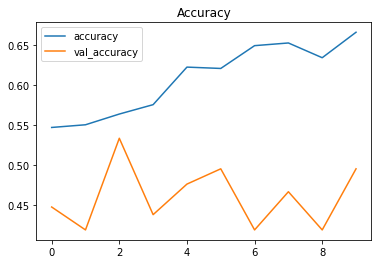

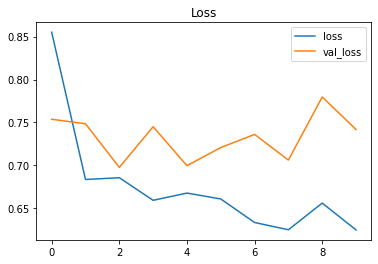

In [13]:
pd.DataFrame(modelFit0.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(modelFit0.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [14]:
baseModelEval = cnnModel.evaluate(testData)

11/11 [==============================] - 21s 2s/step - loss: 0.6223 - accuracy: 0.6338


In [15]:
print(f"Basic CNN Model Accuracy: {baseModelEval[1] * 100:0.2f}")

Basic CNN Model Accuracy: 63.38


### **Building & Training a ResNet Model**

In [16]:
#Building a ResNet Model
from tensorflow.keras.applications import ResNet50V2
resnetBase = ResNet50V2(input_shape=(224,224, 3),
                        include_top=False,
                        weights='imagenet',
                        pooling='max')
resnetBase.trainable = False
inputs = resnetBase.input
x = layers.Dense(128, activation='relu')(resnetBase.output)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
resnetModel = tf.keras.Model(inputs, outputs)

94683136/94668760 [==============================] - 1s 0us/step


In [17]:
#Compiling the Model
resnetModel.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [18]:
#Fitting the data to the model
modelFit = resnetModel.fit(
    trainData,
    epochs = 10,
    steps_per_epoch = len(trainData),
    validation_data = valData,
    validation_steps = len(valData)
)

Epoch 1/10
19/19 [==============================] - 35s 2s/step - loss: 1.6243 - accuracy: 0.7341 - val_loss: 0.5765 - val_accuracy: 0.7810
Epoch 2/10
19/19 [==============================] - 30s 2s/step - loss: 0.3421 - accuracy: 0.8612 - val_loss: 0.5398 - val_accuracy: 0.8190
Epoch 3/10
19/19 [==============================] - 30s 2s/step - loss: 0.2548 - accuracy: 0.9030 - val_loss: 0.3540 - val_accuracy: 0.8476
Epoch 4/10
19/19 [==============================] - 30s 2s/step - loss: 0.2040 - accuracy: 0.9264 - val_loss: 0.1799 - val_accuracy: 0.9238
Epoch 5/10
19/19 [==============================] - 31s 2s/step - loss: 0.1652 - accuracy: 0.9381 - val_loss: 0.1625 - val_accuracy: 0.9143
Epoch 6/10
19/19 [==============================] - 31s 2s/step - loss: 0.1642 - accuracy: 0.9348 - val_loss: 0.2061 - val_accuracy: 0.9238
Epoch 7/10
19/19 [==============================] - 30s 2s/step - loss: 0.1186 - accuracy: 0.9582 - val_loss: 0.1747 - val_accuracy: 0.9238
Epoch 8/10
19/19 [==

In [19]:
# Tuning the model

resnetBase.trainble = True
for layer in resnetBase.layers[:-3]:
  resnetBase.trainable = False

resnetModel.compile(
     loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00085),
    metrics = ["accuracy"]
)

modelFit1 = resnetModel.fit(
    trainData,
    epochs = 20,
    steps_per_epoch = len(trainData),
    validation_data = valData,
    validation_steps = len(valData)
)

Epoch 1/20
19/19 [==============================] - 35s 2s/step - loss: 0.2647 - accuracy: 0.9164 - val_loss: 0.2487 - val_accuracy: 0.9048
Epoch 2/20
19/19 [==============================] - 31s 2s/step - loss: 0.1132 - accuracy: 0.9548 - val_loss: 0.2128 - val_accuracy: 0.9333
Epoch 3/20
19/19 [==============================] - 30s 2s/step - loss: 0.1189 - accuracy: 0.9515 - val_loss: 0.4077 - val_accuracy: 0.9048
Epoch 4/20
19/19 [==============================] - 31s 2s/step - loss: 0.1837 - accuracy: 0.9331 - val_loss: 0.2700 - val_accuracy: 0.8667
Epoch 5/20
19/19 [==============================] - 30s 2s/step - loss: 0.1341 - accuracy: 0.9465 - val_loss: 0.3438 - val_accuracy: 0.8952
Epoch 6/20
19/19 [==============================] - 30s 2s/step - loss: 0.0793 - accuracy: 0.9766 - val_loss: 0.3731 - val_accuracy: 0.9048
Epoch 7/20
19/19 [==============================] - 30s 2s/step - loss: 0.1168 - accuracy: 0.9582 - val_loss: 0.3955 - val_accuracy: 0.8476
Epoch 8/20
19/19 [==

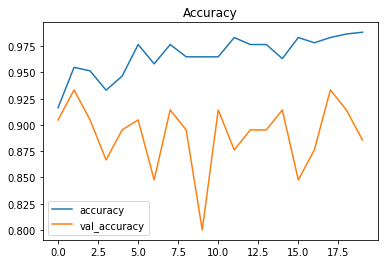

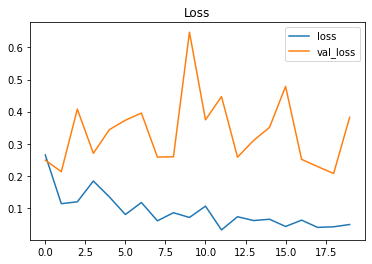

In [20]:
pd.DataFrame(modelFit1.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(modelFit1.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [21]:
resnetModelEval = resnetModel.evaluate(testData)

11/11 [==============================] - 18s 2s/step - loss: 0.7460 - accuracy: 0.7785


In [22]:
print(f"ResNet Model Accuracy: {resnetModelEval[1] * 100:0.2f}")

ResNet Model Accuracy: 77.85


### **Building & Training a EfficientNet Model**

In [23]:
#Building a Model on EfficientNet
effnetBase = tf.keras.applications.EfficientNetB5(include_top= False)
effnetBase.trainable = False
inputs = tf.keras.Input(shape=(224,224,3))
x = effnetBase(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(2, activation = "softmax")(x)
effnetModel = tf.keras.Model(inputs,outputs)

115277824/115263384 [==============================] - 2s 0us/step


In [24]:
#Compiling the Model
effnetModel.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [25]:
#Fitting data to the model
effnetModel.fit(
    trainData,
    epochs = 5,
    steps_per_epoch = len(trainData),
    validation_data = valData,
    validation_steps = len(valData)
)

Epoch 1/5
19/19 [==============================] - 47s 2s/step - loss: 0.7020 - accuracy: 0.5100 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 2/5
19/19 [==============================] - 30s 2s/step - loss: 0.7012 - accuracy: 0.4950 - val_loss: 0.6909 - val_accuracy: 0.5333
Epoch 3/5
19/19 [==============================] - 31s 2s/step - loss: 0.6938 - accuracy: 0.5334 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 4/5
19/19 [==============================] - 30s 2s/step - loss: 0.6936 - accuracy: 0.5268 - val_loss: 0.7092 - val_accuracy: 0.4667
Epoch 5/5
19/19 [==============================] - 31s 2s/step - loss: 0.7087 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5333


In [26]:
#Tuning the model

effnetBase.trainble = True

for layer in effnetBase.layers[:-3]:
  effnetBase.trainable = False


effnetModel.compile(
     loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00085),
    metrics = ["accuracy"]
)

modelFit2 = effnetModel.fit(
    trainData,
    epochs = 20,
    steps_per_epoch = len(trainData),
    validation_data = valData,
    validation_steps = len(valData)
)

Epoch 1/20
19/19 [==============================] - 46s 2s/step - loss: 0.6951 - accuracy: 0.5334 - val_loss: 0.6909 - val_accuracy: 0.5619
Epoch 2/20
19/19 [==============================] - 31s 2s/step - loss: 0.6982 - accuracy: 0.5385 - val_loss: 0.7146 - val_accuracy: 0.4667
Epoch 3/20
19/19 [==============================] - 30s 2s/step - loss: 0.7054 - accuracy: 0.4916 - val_loss: 0.6905 - val_accuracy: 0.5333
Epoch 4/20
19/19 [==============================] - 31s 2s/step - loss: 0.6956 - accuracy: 0.5151 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 5/20
19/19 [==============================] - 31s 2s/step - loss: 0.7000 - accuracy: 0.5084 - val_loss: 0.6906 - val_accuracy: 0.5333
Epoch 6/20
19/19 [==============================] - 31s 2s/step - loss: 0.6956 - accuracy: 0.5067 - val_loss: 0.6985 - val_accuracy: 0.5333
Epoch 7/20
19/19 [==============================] - 30s 2s/step - loss: 0.7068 - accuracy: 0.5117 - val_loss: 0.7324 - val_accuracy: 0.5333
Epoch 8/20
19/19 [==

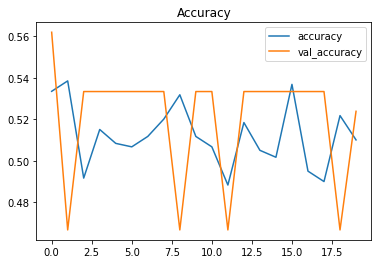

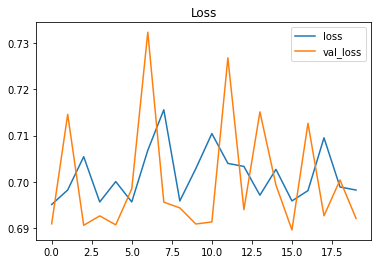

In [27]:
pd.DataFrame(modelFit2.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(modelFit2.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [28]:
effnetEval = effnetModel.evaluate(testData)

11/11 [==============================] - 18s 2s/step - loss: 0.6955 - accuracy: 0.3600


In [29]:
print(f"EfficientNet Model Accuarcy: {effnetEval[1] * 100 :0.2f}")

EfficientNet Model Accuarcy: 36.00


## **Model Predictions**

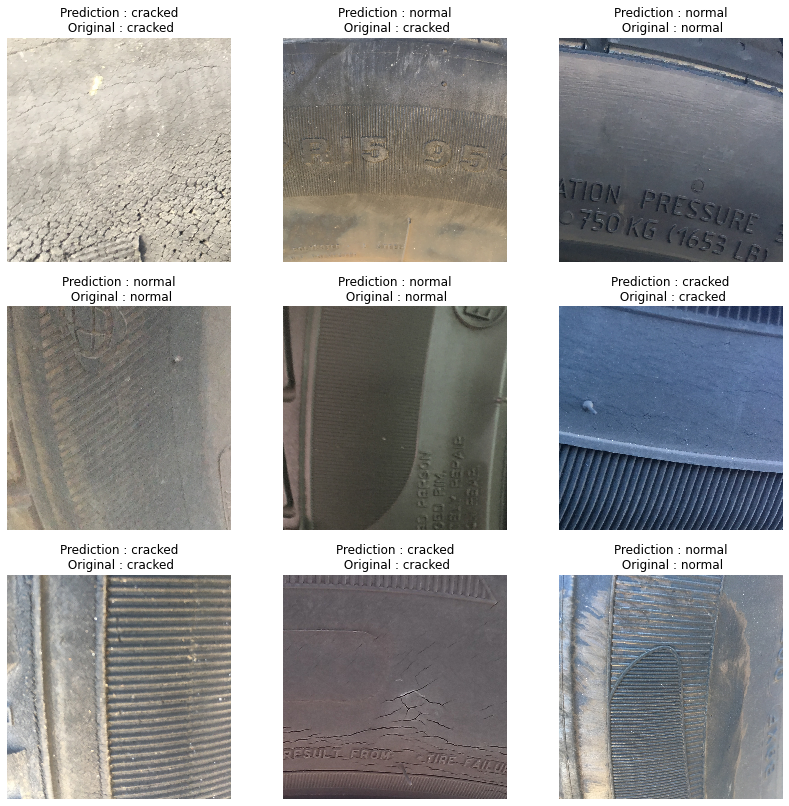

In [30]:
# ResNet Model Prediction & Visualization

plt.figure(figsize=(14,14))

for i in range(9):
    image, label = testData.next()
    resnetPred = resnetModel.predict(image)
    plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction : {labelNamesTest[tf.argmax(resnetPred[i])]}\n Original : {labelNamesTest[tf.argmax(label[i])]}")
    plt.axis("off")

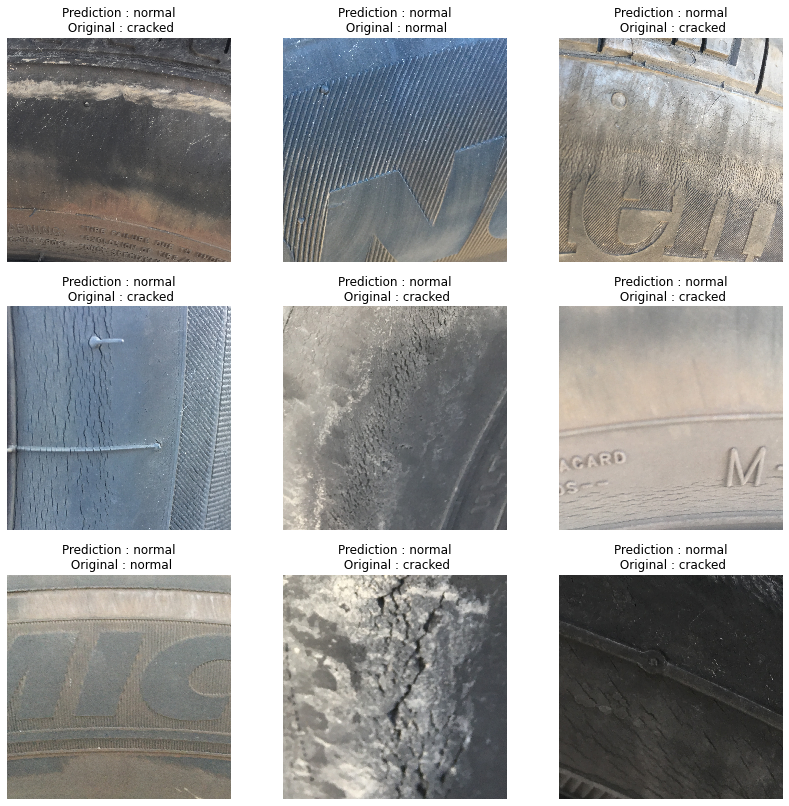

In [31]:
# EfficientNet Model Prediction & Visualization

plt.figure(figsize=(14,14))
    
for i in range(9):
        image, label = testData.next()
        effnetPred = effnetModel.predict(image)
        plt.subplot(3,3,i+1)
        plt.imshow(image[i])
        plt.title(f"Prediction : {labelNamesTest[tf.argmax(effnetPred[i])]}\n Original : {labelNamesTest[tf.argmax(label[i])]}")
        plt.axis("off")